In [2]:
import numpy as np
import pandas as pd

import matplotlib.ticker as ticker
from matplotlib import cm

from py.plots.plotting import plotQuadrants, plotTraceDeterminant

import matplotlib.pyplot as plt

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2

In [31]:
path = '/Users/ronja/opt/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/'
plt.style.use(path + 'template.mplstyle')

def setAxes(df, nmb):
    
    # Add minorticks on the colorbar to make it easy to read the
    # values off the colorbar.
    
    nmb_labels = 5
                
    idx_x = np.linspace(0,len(df.columns.values)-1, nmb_labels).astype(int)
    idx_y = np.linspace(0,len(df.index.values)-1, nmb_labels).astype(int)
        
    xliste= np.round(df.columns.values, decimals=2)[idx_x]
    yliste= np.round(df.index.values, decimals=2)[idx_y]
    
    #xliste = np.linspace(xaxis[0],xaxis[-1],nmb_labels)
    #yliste = np.linspace(yaxis[-1],yaxis[0],nmb_labels)
    
    xlabels=list('%.1f'%(e) for e in xliste)
    ylabels=list('%.1f'%(e) for e in yliste)
    
    return xlabels, ylabels

def plotDiscreteMap(df, xaxis='I_e', yaxis='I_i', scatter=False,
                    title='State space for default values', 
                    plot='dom_frequ', colorbar=True, colorbar_title='dom. frequency'):
    
    p_colors = cm.get_cmap('Accent', 4)
    
    frequs = df.pivot_table(plot, columns=xaxis, index=yaxis)
 #   downs = df.pivot_table('down_duration', columns=xaxis, index=yaxis)
 #   ups = df.pivot_table('up_duration', columns=xaxis, index=yaxis)
    
    fig, ax = plt.subplots(1,1,figsize=(8,8))
    
    
    vals=df[plot].to_numpy()
    mini = min(vals)
    if any(np.isinf(vals)):
        maxi=20
    else:
        maxi = max(vals)
    
    
    nmb_labels = 5
                
    xlabels, ylabels = setAxes(frequs, nmb_labels)
    
  #  pos = ax.imshow(stabis, origin='lower', vmin=1, vmax=4, aspect='auto', interpolation='gaussian', cmap='gist_gray')#cmap=p_colors) #
    import seaborn as sns
    sns.jointplot(data=df, x=xaxis, y=yaxis, hue=plot)
    #pos = ax.imshow(frequs, origin='lower', vmin=mini, vmax=maxi, aspect='auto', cmap='viridis') #
  #  ax.contour(downs, origin='lower', vmin=0, vmax=2, levels=1, cmap='YlGnBu', interpolation='gaussian')
  #  ax.contour(ups, origin='lower', vmin=0, vmax=2, levels=20, cmap='RdGy', linestyles='dashed', interpolation='gaussian')
    
    ax.set(title=title)
    
    
    
    if scatter:
        scatter0 = stabis.columns.values.flat[np.abs(stabis.columns.values - scatter[0]).argmin()]#findNearest(stabis.index.values, scatter[0])
        scatter1 = stabis.index.values.flat[np.abs(stabis.index.values - scatter[1]).argmin()] #findNearest(stabis.index.values, scatter[1])
        xnodes = np.linspace(0, len(stabis.columns.values)-1, len(stabis.columns.values))
        ynodes = np.linspace(0, len(stabis.index.values)-1, len(stabis.index.values))
        ax.scatter(xnodes[list(stabis.columns.values).index(scatter0)], ynodes[list(stabis.index.values).index(scatter1)], s=150, c='yellow', marker='*', zorder=2) 
        
    # Add minorticks on the colorbar to make it easy to read the
    # values off the colorbar.
    
    ax.xaxis.set_major_locator(ticker.LinearLocator(nmb_labels))
    ax.set_xticklabels(labels=xlabels)
    ax.yaxis.set_major_locator(ticker.LinearLocator(nmb_labels))
    ax.set_yticklabels(labels=ylabels)
    
    ax.set_xlabel(r'$%s$' %xaxis)
    ax.set_ylabel(r'$%s$' %yaxis, labelpad=10, rotation=0)
    
    ax.label_outer()
    
    cbar_ticks=np.linspace(mini,maxi,4)
    cbar_ticks=np.around(cbar_ticks, decimals=2)
    
    if colorbar:
        # Create colorbar
        cb_ax = fig.add_axes([.93,.126,.04,.754])
        cbar = ax.figure.colorbar(pos, ax=ax, ticks=cbar_ticks, cax=cb_ax)
        cbar.ax.set_ylabel(colorbar_title, rotation=-90, va="bottom")
        cbar.ax.set_yticklabels(cbar_ticks)
        
        
        cbar.minorticks_on()
        
    
        
    plt.legend(loc='lower right')
    
    
    
    plt.show()

In [32]:
df_default = pd.read_csv('default_temp_frequs.csv')


df_default_show = df_default[df_default['I_e']>=-1]
df_default_show = df_default_show[df_default_show['I_e']<=0.8]
df_default_show = df_default_show[df_default_show['I_i']>=-1]
df_default_show = df_default_show[df_default_show['I_i']<=0.2]

In [33]:
df_default

,Unnamed: 0,I_e,I_i,dom_frequ,down_duration,up_duration
0,0,-0.711111,-2.000000,53.710938,0.102696,0.046249
1,0,-0.711111,-1.955556,54.931641,0.102163,0.043472
2,0,-0.711111,-1.911111,54.931641,0.103436,0.042200
3,0,-0.711111,-1.866667,54.931641,0.104495,0.041140
4,0,-0.711111,-1.822222,54.931641,0.105473,0.040163
...,...,...,...,...,...,...
389,0,0.133333,-0.533333,31.738281,0.015792,0.236270
390,0,0.133333,-0.488889,31.738281,0.016825,0.235236
391,0,0.133333,-0.444444,31.738281,0.017966,0.234096
392,0,0.133333,-0.400000,31.738281,0.019172,0.232889


/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_3333/2331560770.py:72: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=xlabels)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_3333/2331560770.py:74: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=ylabels)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


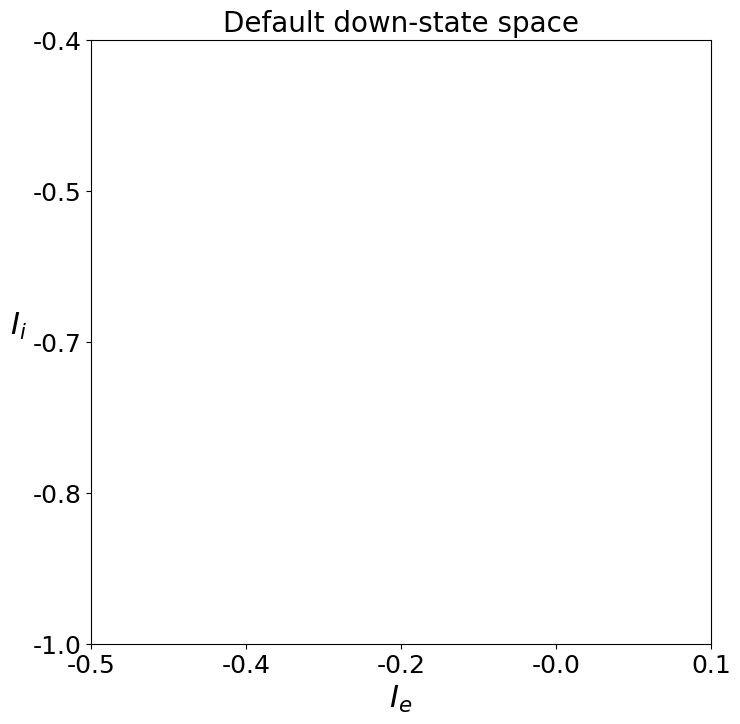

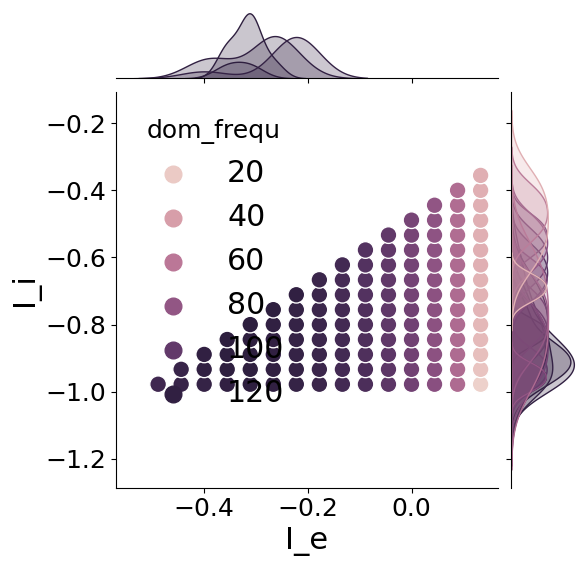

In [34]:
plotDiscreteMap(df_default_show, title='Default down-state space', # + r'$LC_{ei}$' + ' frequencies', 
                plot='dom_frequ', colorbar = False, colorbar_title='space of down-states')

In [22]:
df = pd.read_csv('adaps_temp_frequs.csv')


#df = df[df['I_e']>=-1]
#df = df[df['I_e']<=1]
#df = df[df['I_i']>=-1]
#df = df[df['I_i']<=1]

In [23]:
#df['down_duration'][df['down_duration'].isnull()] = float('inf')
df

,Unnamed: 0,I_e,I_i,dom_frequ,down_duration,up_duration
0,0,-0.166667,-1.000000,108.642578,0.042973,0.030663
1,0,-0.133333,-0.966667,112.304688,0.040049,0.031186
2,0,-0.133333,-1.000000,112.304688,0.039305,0.031930
3,0,-0.100000,-0.933333,115.966797,0.037398,0.031587
4,0,-0.100000,-0.966667,114.746094,0.037030,0.032690
...,...,...,...,...,...,...
199,0,0.500000,-0.866667,85.449219,0.012657,0.080966
200,0,0.500000,-0.900000,85.449219,0.012183,0.081440
201,0,0.500000,-0.933333,85.449219,0.011710,0.081913
202,0,0.500000,-0.966667,86.669922,0.011037,0.081267


/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_1408/4230639006.py:70: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=xlabels)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_1408/4230639006.py:72: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=ylabels)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


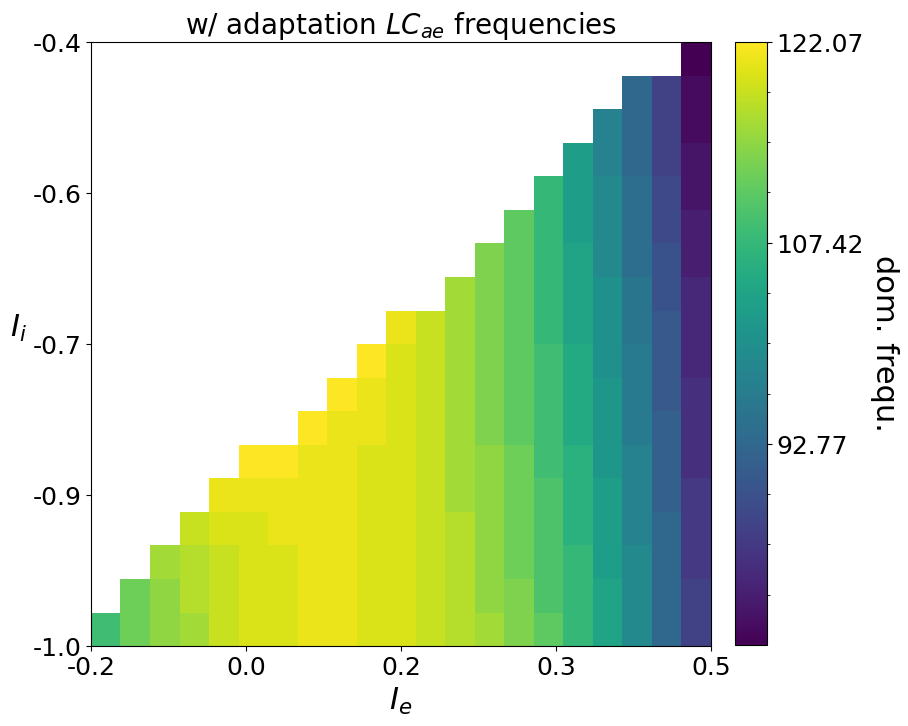

In [27]:
plotDiscreteMap(df, title='w/ adaptation ' + r'$LC_{ae}$' + ' frequencies', 
                plot='dom_frequ', colorbar = True, colorbar_title='dom. frequ.')